<a href="https://colab.research.google.com/github/karthickthangadurai/Guvi_Task_6/blob/main/T6_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_csv("car_data.csv")
df_hot=df.copy()

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [6]:
col=[df.columns[1]]
col

['Mileage']

In [7]:
#Finding the IQR and Upper Limit and Lower Limit
for i in col:

  percentile25 = df[i].quantile(0.25)
  percentile75 = df[i].quantile(0.75)
  iqr=percentile75 - percentile25
  upper_limit = round(percentile75 + 1.5 * iqr)
  lower_limit = round(percentile25 - 1.5 * iqr)
  print(f"{i} \n Upper limit is {upper_limit} \n Lower_limit is {lower_limit}")
  

Mileage 
 Upper limit is 41097 
 Lower_limit is -1261


# **EDA**

# **Outliers in Mileage**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


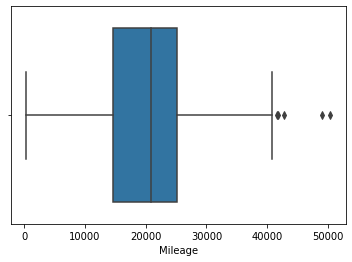

In [8]:
sns.boxplot(df.Mileage)

# **Outliers in Mileage**

In [9]:
print("No of outliers in Mileage---->",df[df.Mileage>=upper_limit].shape[0])

No of outliers in Mileage----> 5


Correlation


,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


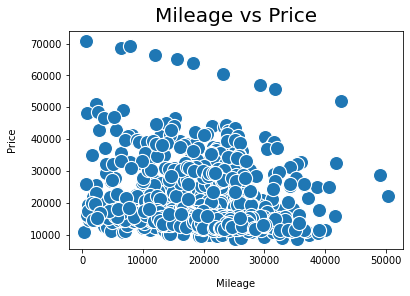

In [10]:

sns.scatterplot(x='Mileage', y='Price', data=df, s=200)
plt.title("Mileage vs Price", y=1.015, fontsize=20)
plt.xlabel("Mileage", labelpad=13)
plt.ylabel("Price", labelpad=13)
ax = plt.gca()
print("Correlation")
df[["Mileage","Price"]].corr()

 **No linear relationship.So, transforming.**

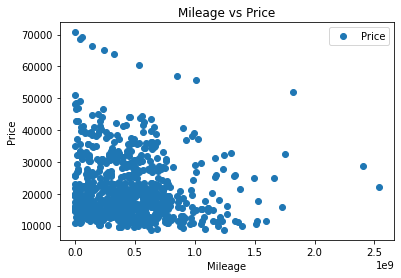

,Mileage_sqr,Price
Mileage_sqr,1.000000,-0.117232
Price,-0.117232,1.000000


In [11]:

df['Mileage_sqr'] = np.power(df['Mileage'],2)
df.plot(x='Mileage_sqr', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()
df[['Mileage_sqr','Price']].corr()

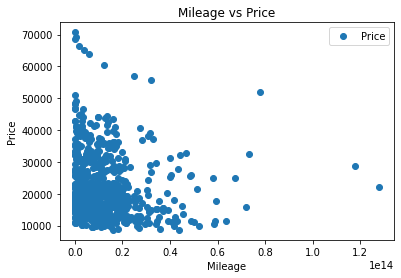

,Mileage_cube,Price
Mileage_cube,1.000000,-0.085018
Price,-0.085018,1.000000


In [12]:

df['Mileage_cube'] = np.power(df['Mileage'],3)
df.plot(x='Mileage_cube', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()
df[['Mileage_cube','Price']].corr()

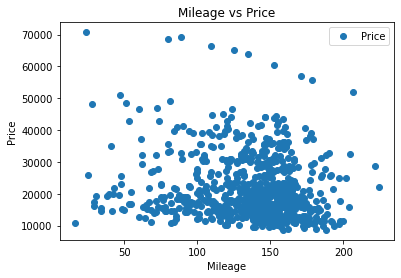

,Mileage_SqrRt,Price
Mileage_SqrRt,1.000000,-0.149316
Price,-0.149316,1.000000


In [13]:

df['Mileage_SqrRt']= np.sqrt(df['Mileage'])
#df.groupby('Mileage')['Price'].mean().plot()
df.plot(x='Mileage_SqrRt', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

df[['Mileage_SqrRt', 'Price']].corr()

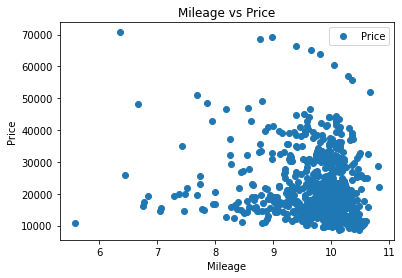

,logOf_Mileage,Price
logOf_Mileage,1.000000,-0.145424
Price,-0.145424,1.000000


In [14]:

df['logOf_Mileage']= np.log(df['Mileage'])
# df.groupby('Mileage')['Price'].mean().plot()
df.plot(x='logOf_Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

df[['logOf_Mileage', 'Price']].corr()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


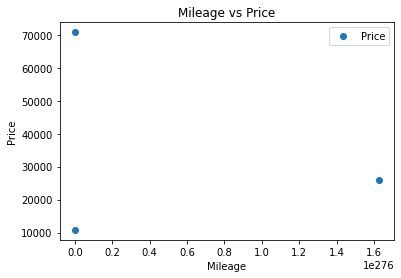

,Mileage_exponent,Price
Mileage_exponent,NaN,-0.0
Price,-0.0,1.0


In [15]:

df['Mileage_exponent']= np.exp(df['Mileage'])
#df.groupby('Mileage')['Price'].mean().plot()
df.plot(x='Mileage_exponent', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

df[['Mileage_exponent', 'Price']].corr()

Mileage is not having linear relationship with Price. Eventhough various transformation has done but it has correlation value between -0.2 to 0.2. So linear relationship cannot be performed  

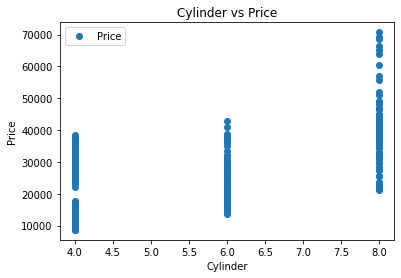

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


In [16]:
df.plot(x='Cylinder', y='Price', style='o')
plt.title('Cylinder vs Price')
plt.xlabel('Cylinder')
plt.ylabel('Price')
plt.show()

df[['Cylinder', 'Price']].corr()

**Positive linear relationship b/w Cylinder and Price. It can be used in Linear Regression**

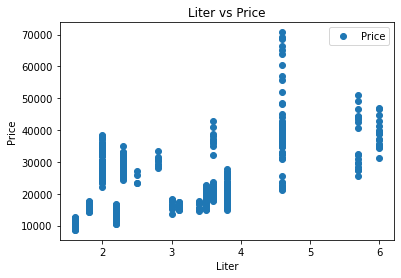

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


In [17]:
df.plot(x='Liter', y='Price', style='o')
plt.title('Liter vs Price')
plt.xlabel('Liter')
plt.ylabel('Price')
plt.show()

df[['Liter', 'Price']].corr()

**Positive linear relationship b/w Liter and Price. It can be used in Linear Regression**

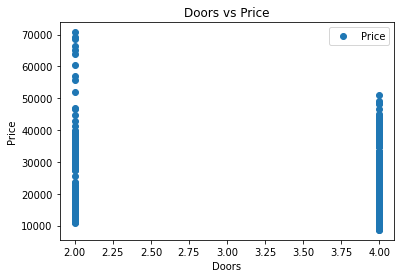

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [18]:
df.plot(x='Doors', y='Price', style='o')
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()

df[['Doors', 'Price']].corr()

**No linear relationship b/w Doors and Price so wiil do transformation and check the linearity**

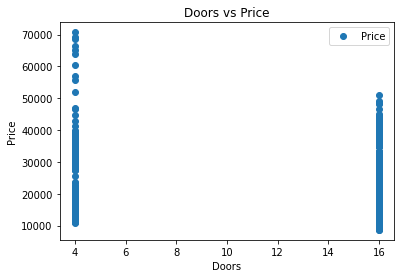

,Doors_sqr,Price
Doors_sqr,1.00000,-0.13875
Price,-0.13875,1.00000


In [19]:

df['Doors_sqr'] = np.power(df['Doors'],2)
df.plot(x='Doors_sqr', y='Price', style='o')
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()
df[['Doors_sqr','Price']].corr()

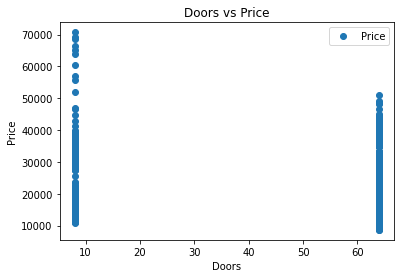

,Doors_cube,Price
Doors_cube,1.00000,-0.13875
Price,-0.13875,1.00000


In [20]:

df['Doors_cube'] = np.power(df['Doors'],3)
df.plot(x='Doors_cube', y='Price', style='o')
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()
df[['Doors_cube','Price']].corr()

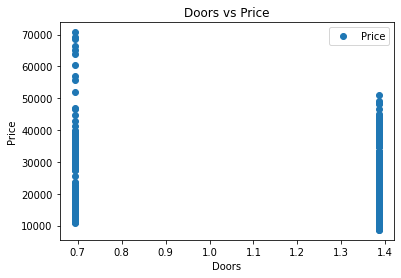

,Doors_log,Price
Doors_log,1.00000,-0.13875
Price,-0.13875,1.00000


In [21]:

df['Doors_log'] = np.log(df['Doors'])
df.plot(x='Doors_log', y='Price', style='o')
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()
df[['Doors_log','Price']].corr()

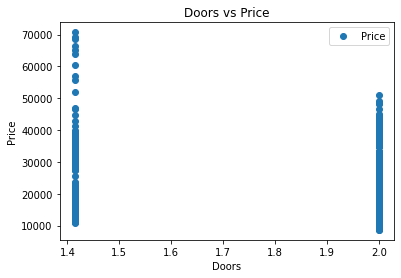

,Doors_sqrt,Price
Doors_sqrt,1.00000,-0.13875
Price,-0.13875,1.00000


In [22]:

df['Doors_sqrt'] = np.sqrt(df['Doors'])
df.plot(x='Doors_sqrt', y='Price', style='o')
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()
df[['Doors_sqrt','Price']].corr()

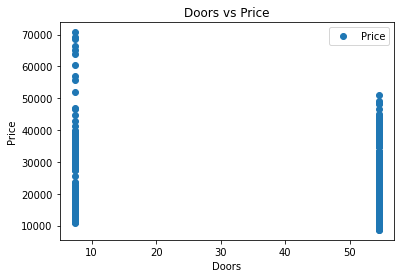

,Doors_exponential,Price
Doors_exponential,1.00000,-0.13875
Price,-0.13875,1.00000


In [23]:

df['Doors_exponential'] = np.exp(df['Doors'])
df.plot(x='Doors_exponential', y='Price', style='o')
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()
df[['Doors_exponential','Price']].corr()

**No linear relationship b/w Doors vs Price after transformation. So linear relationship cannot be performed  **

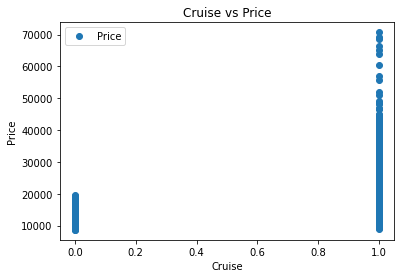

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


In [24]:
df.plot(x='Cruise', y='Price', style='o')
plt.title('Cruise vs Price')
plt.xlabel('Cruise')
plt.ylabel('Price')
plt.show()

df[['Cruise', 'Price']].corr()

**Positive linear relationship b/w Cruise and Price. It can be used in Linear Regression**

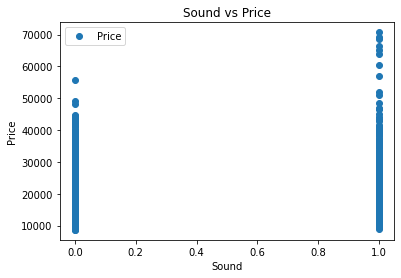

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [25]:
df.plot(x='Sound', y='Price', style='o')
plt.title('Sound vs Price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()

df[['Sound', 'Price']].corr()

**No linear relationship b/w Sound and Price so wiil do transformation and check the linearity**

In [26]:
l = ["Sound_sqr","Sound_cube","Sound_sqrt","Sound_log","Sound_Exponential"]
df['Sound_sqr'] = np.power(df['Sound'],2)
df['Sound_cube'] = np.power(df['Sound'],3)
df['Sound_sqrt'] = np.sqrt(df['Sound'])
df['Sound_log'] = np.log(df['Sound'])
df['Sound_Exponential'] = np.exp(df['Sound'])

for i in l:
  print(f"Correlation --- {i} vs price \n \n",df[[i,"Price"]].corr(),"\n")

Correlation --- Sound_sqr vs price 
 
            Sound_sqr     Price
Sound_sqr   1.000000 -0.124348
Price      -0.124348  1.000000 

Correlation --- Sound_cube vs price 
 
             Sound_cube     Price
Sound_cube    1.000000 -0.124348
Price        -0.124348  1.000000 

Correlation --- Sound_sqrt vs price 
 
             Sound_sqrt     Price
Sound_sqrt    1.000000 -0.124348
Price        -0.124348  1.000000 

Correlation --- Sound_log vs price 
 
            Sound_log  Price
Sound_log        NaN    NaN
Price            NaN    1.0 

Correlation --- Sound_Exponential vs price 
 
                    Sound_Exponential     Price
Sound_Exponential           1.000000 -0.124348
Price                      -0.124348  1.000000 



/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


**No linear relationship b/w Sound vs Price after transformation. So linear relationship cannot be performed**

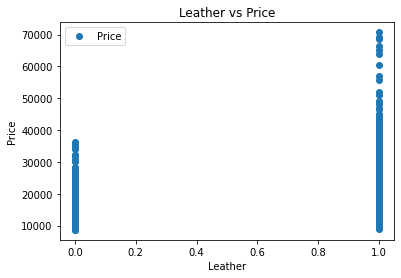

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


In [27]:
df.plot(x='Leather', y='Price', style='o')
plt.title('Leather vs Price')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.show()

df[['Leather', 'Price']].corr()

**No linear relationship b/w Leather and Price so wiil do transformation and check the linearity**

In [28]:
l = ["Leather_sqr","Leather_cube","Leather_sqrt","Leather_log","Leather_Exponential"]
df['Leather_sqr'] = np.power(df['Leather'],2)
df['Leather_cube'] = np.power(df['Leather'],3)
df['Leather_sqrt'] = np.sqrt(df['Leather'])
df['Leather_log'] = np.log(df['Leather'])
df['Leather_Exponential'] = np.exp(df['Leather'])

for i in l:
  print(f"Correlation --- {i} vs price \n \n",df[[i,"Price"]].corr(),"\n")

Correlation --- Leather_sqr vs price 
 
              Leather_sqr     Price
Leather_sqr     1.000000  0.157197
Price           0.157197  1.000000 

Correlation --- Leather_cube vs price 
 
               Leather_cube     Price
Leather_cube      1.000000  0.157197
Price             0.157197  1.000000 

Correlation --- Leather_sqrt vs price 
 
               Leather_sqrt     Price
Leather_sqrt      1.000000  0.157197
Price             0.157197  1.000000 

Correlation --- Leather_log vs price 
 
              Leather_log  Price
Leather_log          NaN    NaN
Price                NaN    1.0 

Correlation --- Leather_Exponential vs price 
 
                      Leather_Exponential     Price
Leather_Exponential             1.000000  0.157197
Price                           0.157197  1.000000 



/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


 **No linear relationship b/w Leather vs Price after transformation. So linear relationship cannot be performed**

# **Task Part 1**

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## **Splitting**

In [29]:
X = df.loc[:, ['Mileage']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Price'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =1)

# **Modelling**

In [30]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

# **The linear regression equation Mileage vs Price**

In [31]:
print("regressor.intercept:",regressor.intercept_) # c
print("regressor.coef",regressor.coef_)
print(f"Linear Regression Equation y_pred = ({regressor.coef_} * Mileage) + {regressor.intercept_} ")

regressor.intercept: 24950.67221150592
regressor.coef [-0.18945075]
Linear Regression Equation y_pred = ([-0.18945075] * Mileage) + 24950.67221150592 


# **The original data and the equation on the chart**

In [32]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred[:20]

array([20399.8756877 , 18770.97811842, 24535.96451447, 20706.02810361,
       19726.75716436, 21737.96635202, 22478.33989247, 23481.48162651,
       22660.21261479, 21452.65351888, 21123.76701268, 19977.58996056,
       20205.30976497, 20868.95575068, 21461.17880274, 19973.42204401,
       21937.83689582, 21738.34525352, 21335.76240464, 22774.26196774])

In [33]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head()

,Actual,Predicted
0,14862.093870,20399.875688
1,11413.530403,18770.978118
2,19567.259291,24535.964514
3,11539.845650,20706.028104
4,18063.004911,19726.757164


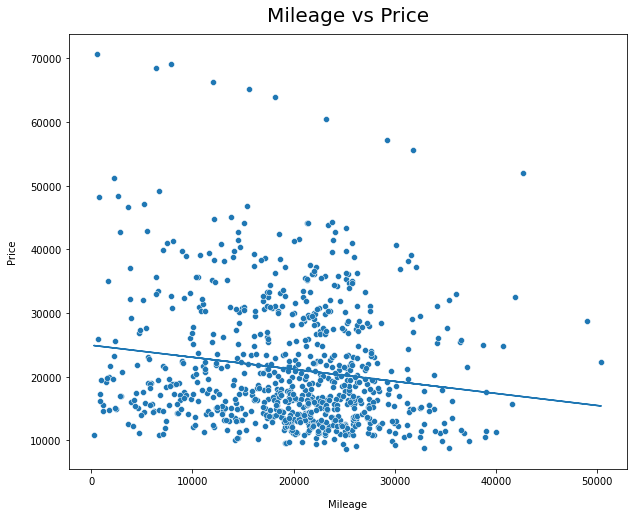

In [34]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title("Mileage vs Price", y=1.015, fontsize=20)
plt.xlabel("Mileage", labelpad=13)
plt.ylabel("Price", labelpad=13)
ax = plt.gca()
plt.plot(X,regressor.predict(X))

# **R2 score**

In [35]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.008431468965738986


**R2-Score is less than 0.5 so this model is not a good model**


## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                804 non-null    float64
 1   Mileage              804 non-null    int64  
 2   Make                 804 non-null    object 
 3   Model                804 non-null    object 
 4   Trim                 804 non-null    object 
 5   Type                 804 non-null    object 
 6   Cylinder             804 non-null    int64  
 7   Liter                804 non-null    float64
 8   Doors                804 non-null    int64  
 9   Cruise               804 non-null    int64  
 10  Sound                804 non-null    int64  
 11  Leather              804 non-null    int64  
 12  Mileage_sqr          804 non-null    int64  
 13  Mileage_cube         804 non-null    int64  
 14  Mileage_SqrRt        804 non-null    float64
 15  logOf_Mileage        804 non-null    flo

In [37]:
df2=df.iloc[:,:12]

In [38]:
df2.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


# **Splitting**

In [39]:
X = df2.loc[:, ['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']].values # select all rows and select all columns except the last column as my feature
y = df2.loc[:, 'Price'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =1)

# **Scaling**

In [40]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train = scaler.transform(X_train) 
X_test= scaler.transform(X_test) 

# **Modelling**

In [41]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

# **The linear regression Parameters**

In [42]:
print("regressor.intercept:",regressor.intercept_) # c
print("regressor.coef",regressor.coef_)

regressor.intercept: 21209.11558795125
regressor.coef [-1424.60535753  6630.64112608 -2052.85036032 -1268.15748239
  2696.51790468  -816.06933884  1376.77766488]


In [43]:
coeff_df = pd.DataFrame(regressor.coef_,['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather'], columns=['Coefficient'])
coeff_df

,Coefficient
Mileage,-1424.605358
Cylinder,6630.641126
Liter,-2052.850360
Doors,-1268.157482
Cruise,2696.517905
Sound,-816.069339
Leather,1376.777665


# **The original data and the equation on the chart**

In [44]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred[:20]

array([27004.90308991, 17611.5560708 , 27730.31800814, 14422.57210918,
       22024.01784943, 12456.59150641, 22793.87726369, 28264.78112309,
       22710.73476884, 19881.36966097, 19044.05021561, 31641.42549527,
       17174.32525736, 19346.48615866, 24912.67463181, 23549.33800616,
       19790.03996225, 20143.16918109, 21121.85740033, 19528.43765311])

In [45]:
P2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
P2.head()

,Actual,Predicted
0,14862.093870,27004.903090
1,11413.530403,17611.556071
2,19567.259291,27730.318008
3,11539.845650,14422.572109
4,18063.004911,22024.017849


#**2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [46]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.41869202094053637


# **3.The combination of the factors that is the best predictor for price**

In [47]:
coeff_df

,Coefficient
Mileage,-1424.605358
Cylinder,6630.641126
Liter,-2052.850360
Doors,-1268.157482
Cruise,2696.517905
Sound,-816.069339
Leather,1376.777665


**Cylinder, Cruise and Liter are the best combination**

In [48]:
# X = df2.loc[:, ['Mileage','Cylinder','Liter','Cruise']].values # select all rows and select all columns except the last column as my feature
X = df2.loc[:, ['Cylinder','Liter','Cruise']].values
y = df2.loc[:, 'Price'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =1)

from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

print("regressor.intercept:",regressor.intercept_) # c
print("regressor.coef",regressor.coef_)

regressor.intercept: -2243.3320665226274
regressor.coef [4015.17463291 -572.82200337 5798.09876918]


In [49]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred[:20]

array([25870.06628966, 18355.25682688, 25469.0908873 , 12557.1580577 ,
       25469.0908873 , 12557.1580577 , 25469.0908873 , 25927.34849   ,
       18469.82122755, 18297.97462654, 19842.83871914, 33041.18255042,
       18355.25682688, 18297.97462654, 25469.0908873 , 25469.0908873 ,
       19842.83871914, 18297.97462654, 18355.25682688, 18355.25682688])

In [50]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.33871495064417234



## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [51]:
df_hot.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [52]:
df_hot.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [53]:
df_hot.Type.unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

In [54]:
df_hot['Type']= df_hot['Type'].map({'Hatchback': 1, 'Coupe': 2, 'Sedan': 3, 'Wagon': 4, 'Convertible': 5})
df_hot

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,3,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,3,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,3,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,3,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,3,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,3,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,3,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,3,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,3,6,3.0,4,1,1,0


In [55]:
df_hot.Model.unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [56]:
df_hot['Model']= df_hot['Model'].map({'Century':1, 'Lacrosse':2, 'Lesabre':3, 'Park Avenue':4, 'CST-V':5, 'CTS':6,
       'Deville':7, 'STS-V6':8, 'STS-V8':9, 'XLR-V8':10, 'AVEO':11, 'Cavalier':12,
     'Classic':13, 'Cobalt':14, 'Corvette':15, 'Impala':16, 'Malibu':17, 'Monte Carlo':18,
       'Bonneville':19, 'G6':20, 'Grand Am':21, 'Grand Prix':22, 'GTO':23, 'Sunfire':24,
       'Vibe':25, '9_3':26, '9_3 HO':27, '9_5':28, '9_5 HO':29, '9-2X AWD':30, 'Ion':31,
       'L Series':32})

In [57]:
df_hot['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [58]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.2 MB/s 


In [59]:
import category_encoders as ce
import pandas as pd
data=pd.DataFrame({'Make':['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn']})
encoder=ce.OneHotEncoder(cols='Make',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Make
0,Buick
1,Cadillac
2,Chevrolet
3,Pontiac
4,SAAB
5,Saturn


In [60]:
df_hot=encoder.fit_transform(df_hot)

In [61]:
df_hot.head()

,Price,Mileage,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,1.0,0.0,0.0,0.0,0.0,0.0,1,Sedan 4D,3,6,3.1,4,1,1,1
1,17542.036083,9135,1.0,0.0,0.0,0.0,0.0,0.0,1,Sedan 4D,3,6,3.1,4,1,1,0
2,16218.847862,13196,1.0,0.0,0.0,0.0,0.0,0.0,1,Sedan 4D,3,6,3.1,4,1,1,0
3,16336.913140,16342,1.0,0.0,0.0,0.0,0.0,0.0,1,Sedan 4D,3,6,3.1,4,1,0,0
4,16339.170324,19832,1.0,0.0,0.0,0.0,0.0,0.0,1,Sedan 4D,3,6,3.1,4,1,0,1


In [62]:
del df_hot['Trim']

{'boxes': [<matplotlib.lines.Line2D at 0x7ffaf2cc1510>],
 'caps': [<matplotlib.lines.Line2D at 0x7ffaf2cc6550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ffaf2ccd590>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ffaf2ccd050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ffaf2cc1a90>,
  <matplotlib.lines.Line2D at 0x7ffaf2cc1fd0>]}

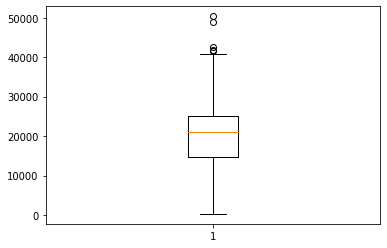

In [63]:
plt.boxplot(df_hot['Mileage'])

In [64]:
percentile25 = df_hot['Mileage'].quantile(0.25)
percentile75 = df_hot['Mileage'].quantile(0.75)
iqr=percentile75 - percentile25
print("IQR is ",iqr)
print("25th Percentile of the Mileage data--->",percentile25)
print("75th Percentile of the Mileage data--->",percentile75)

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("upper_limit ----->",upper_limit)
print("lower_limit ----->",lower_limit)
print('\nCapping method is used for the outliers')
df_hot['Mileage'] = np.where(df_hot['Mileage']>upper_limit,upper_limit,df_hot['Mileage'])
df_hot['Mileage'] = np.where(df_hot['Mileage']<lower_limit,lower_limit,df_hot['Mileage'])

IQR is  10589.5
25th Percentile of the Mileage data---> 14623.5
75th Percentile of the Mileage data---> 25213.0
upper_limit -----> 41097.25
lower_limit -----> -1260.75

Capping method is used for the outliers


{'boxes': [<matplotlib.lines.Line2D at 0x7ffaf2c30310>],
 'caps': [<matplotlib.lines.Line2D at 0x7ffaf2c38310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ffaf2c3f350>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ffaf2c38dd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ffaf2c30850>,
  <matplotlib.lines.Line2D at 0x7ffaf2c30d90>]}

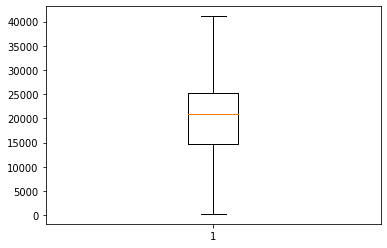

In [65]:
plt.boxplot(df_hot['Mileage'])

In [66]:
df_hot.head(3)

,Price,Mileage,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,1.0,0.0,0.0,0.0,0.0,0.0,1,3,6,3.1,4,1,1,1
1,17542.036083,9135.0,1.0,0.0,0.0,0.0,0.0,0.0,1,3,6,3.1,4,1,1,0
2,16218.847862,13196.0,1.0,0.0,0.0,0.0,0.0,0.0,1,3,6,3.1,4,1,1,0


In [67]:
df_hot.corr()

,Price,Mileage,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.146283,-0.017768,0.659297,-0.404598,-0.142095,0.335404,-0.211701,-0.084207,0.484443,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.146283,1.000000,0.025439,-0.037998,-0.015180,-0.028892,0.050406,0.018501,0.025238,0.034427,-0.028069,-0.016878,-0.015384,0.023516,-0.025447,-0.000876
Make_Buick,-0.017768,0.025439,1.000000,-0.110497,-0.270289,-0.159196,-0.135115,-0.094398,-0.562671,0.044748,0.175317,0.188093,0.184913,0.190645,-0.011824,-0.212930
Make_Cadillac,0.659297,-0.037998,-0.110497,1.000000,-0.270289,-0.159196,-0.135115,-0.094398,-0.376131,0.138440,0.534896,0.406216,0.087104,0.190645,-0.091932,0.205301
Make_Chevrolet,-0.404598,-0.015180,-0.270289,-0.270289,1.000000,-0.389412,-0.330507,-0.230909,-0.262633,-0.434844,-0.157535,-0.124052,-0.145813,-0.293190,0.259566,0.155492
Make_Pontiac,-0.142095,-0.028892,-0.159196,-0.159196,-0.389412,1.000000,-0.194664,-0.136002,0.274255,0.064470,0.114436,0.113863,0.040943,0.000939,-0.074314,-0.089854
Make_SAAB,0.335404,0.050406,-0.135115,-0.135115,-0.330507,-0.194664,1.000000,-0.115430,0.508594,0.432582,-0.371877,-0.326754,-0.025680,0.233118,-0.087209,0.003809
Make_Saturn,-0.211701,0.018501,-0.094398,-0.094398,-0.230909,-0.136002,-0.115430,1.000000,0.476875,-0.068493,-0.191548,-0.180941,-0.064852,-0.199044,-0.139371,-0.152794
Model,-0.084207,0.025238,-0.562671,-0.376131,-0.262633,0.274255,0.508594,0.476875,1.000000,0.188437,-0.412403,-0.345197,-0.158757,-0.088664,-0.114323,-0.070498
Type,0.484443,0.034427,0.044748,0.138440,-0.434844,0.064470,0.432582,-0.068493,0.188437,1.000000,0.001811,0.012161,0.057149,0.241219,-0.152614,-0.076868


In [68]:
df_hot.columns

Index(['Price', 'Mileage', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

# **Splitting**

In [69]:
X = df_hot[['Mileage', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_SAAB', 'Make_Saturn', 'Model', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values #array of features
y = df_hot['Price'].values #array of targets

In [70]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#**Scalling**

In [71]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

#**Model Fitting**

In [72]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = regressor.predict(X_test)

In [74]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred.head()

,Actual,Predicted
0,16143.957292,12635.671784
1,13762.901447,13618.838548
2,16295.211438,18511.943510
3,48365.980897,44267.667364
4,23527.728502,22101.700348


# **Evaluation Metrics**

In [75]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9150517023002882


When we use this features Mileage,Make_Cadillac,Make_Chevrolet,Make_SAAB, Make_Saturn,Model,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather for our model we Get high R(square) value.So,this are the best combination of factors to predict price.